In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from PIL import Image
import scipy.spatial
from itertools import product

In [2]:
images = {} #this will store images of each person
#loading all images into the "images" dictionary
size = 100

for image_str in os.listdir('pics'):
    name_arr = image_str.split('-')
    name = name_arr[0] +' ' + name_arr[1]
    if images.get(name,0) == 0:
        images[name] = []
    img = Image.open('pics/'+image_str)
    new_img = img.resize((size,size))    #resize all pics to same size
    images[name].append(new_img.convert('L'))

num_faces = len(images.keys())*4


253
2
239
0
254
6
186
6
253
0
255
0
240
0
255
0
230
0
239
10
227
20
229
9
252
0
251
5
244
10
229
12
255
0
237
11
254
10
254
0
255
1
251
17
219
2
255
24
253
0
229
4
236
5
244
2
210
0
255
4
251
0
254
0
231
15
252
7
246
1
227
2
250
0
249
2
254
2
251
2


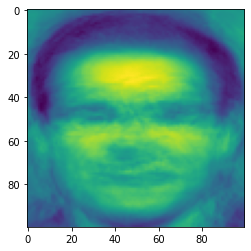

(100, 100)

In [31]:
avg_face = np.zeros((size,size))


for key in images.keys():
    for i in range(4):
        avg_face += np.array(images[key][i].convert('L'))

        
avg_face /= num_faces
plt.imshow(avg_face)
plt.show()
avg_face.shape

In [4]:
A = np.empty((len(images.keys())*4,size*size))

face_idx = 0
for key in images.keys():
    for i in range(4):
        orig_face = images[key][i].convert('L')
        A[face_idx] = (np.array(orig_face)-avg_face).flatten()
        face_idx+=1

In [5]:
A = A.T


In [6]:
L = np.matmul(A.T,A)
L /= num_faces


In [7]:
A.shape

(10000, 40)

In [8]:
L.shape

(40, 40)

In [9]:
evals, evects = np.linalg.eig(L)

sort_indices = evals.argsort()[::-1]                             
evals = evals[sort_indices]                               
evects = evects[:,sort_indices]

M_prime = (30)
evals = evals[:M_prime]
evects = evects[:,:M_prime]

In [10]:
sort_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17,
       18, 19, 20, 21, 22, 27, 28, 31, 32, 33, 34, 36, 37, 39, 38, 35, 30,
       29, 26, 25, 24, 23, 15], dtype=int64)

In [11]:
np.diff(evals)

array([-2358724.62090011,  -528916.6013032 , -1070292.90763486,
        -756439.87419698,  -322889.71029866,  -112544.92064861,
        -177686.22575304,  -118688.26247727,   -89570.9232947 ,
         -67557.72586393,   -79013.60726031,   -60119.48135671,
         -37173.21623282,   -16920.51867654,   -38506.11860439,
         -43611.49950123,   -15142.58522056,   -46700.00500423,
          -7323.36022488,   -14779.78958174,   -16673.08214072,
         -37614.90131448,    -4914.87222372,   -14428.25105083,
          -7714.49912988,   -10600.76700947,   -10779.39615031,
         -11189.51567414,    -7389.60602926])

In [12]:
evects = np.dot(A,evects)

In [13]:
for i in range(M_prime):
    
    evects[:,i] = evects[:,i]/np.linalg.norm(evects[:,i])

In [14]:
W_k = np.dot(evects.T,A)

In [15]:
#now onto testing:

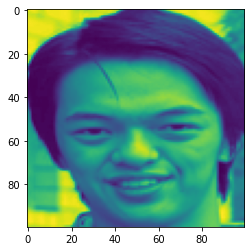

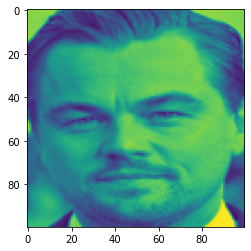

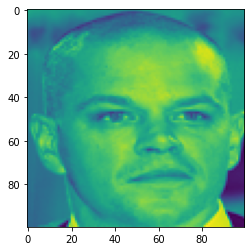

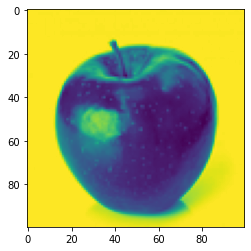

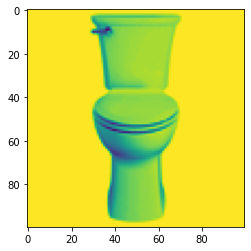

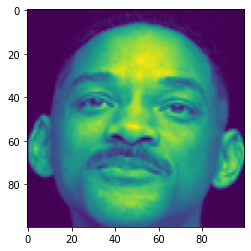

In [16]:
new_faces = {}
for image_str in os.listdir('test'):
    name_arr = image_str.split('-')
    name = name_arr[0] +' ' + name_arr[1]
    img = Image.open('test/'+image_str)
    img = img.resize((size,size)).convert('L')
    new_faces[name] = img.convert('L')
    
    plt.imshow(img)
    plt.show()

In [17]:
def solve(image):
    img = (image - avg_face).reshape(size*size,1)

    W = np.dot(evects.T,img)
    norms = np.linalg.norm(W-W_k, axis = 0)

#     avg_norms = np.zeros(int(num_faces/4))
#     for i in range(len(avg_norms)):
#         for j in range(4):
#             avg_norms[i] += norms[i*4+j]
#     avg_norms/=4
# #     print(avg_norms) #check for recognition
    phi_hat = np.zeros(size*size)
    phi = img.reshape(size*size)
    for i in range(M_prime):
#         print(evects.shape)
#         print(evects.T[i].shape)
#         print(phi.shape)
#         print(evects[i].shape)
#         print(np.dot(evects.T[i],phi))
        phi_hat += evects.T[i]@phi* evects.T[i]

    norms_phi = np.linalg.norm(phi-phi_hat.reshape(size*size), axis = 0)

    norms_phi #check for detection

#     idx = np.argmin(avg_norms)
    detection_threshold = 6000
#     recognition_threshold = 7000
    if norms_phi <detection_threshold:
        print("We classify this as a face")
        print(norms_phi)
        plt.imshow(img.reshape((size,size)))
        plt.show()
        return True
    else:
        print("We classify this as not a face")
        print(norms_phi)
        return False
    



We classify this as a face
3618.9083455835034


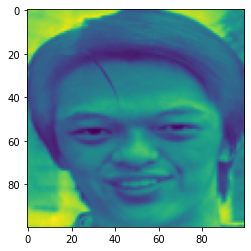

We classify this as a face
3504.3779404103316


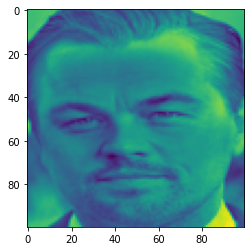

We classify this as a face
2806.7015401106037


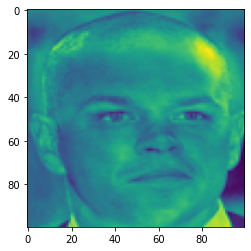

We classify this as a face
4916.832421403939


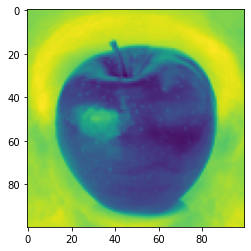

We classify this as a face
3833.8786856665383


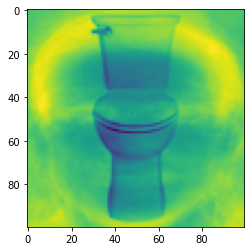

We classify this as a face
3277.3300176660646


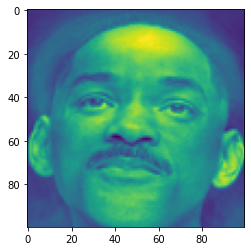

In [18]:
for key in new_faces.keys():
    img = new_faces[key]
    solve(img)



We classify this as a face
594.2581779567646


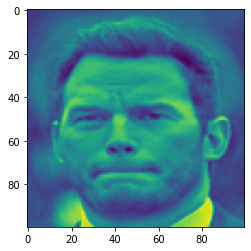

We classify this as a face
394.4031512292172


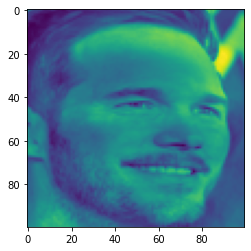

We classify this as a face
575.7640085094326


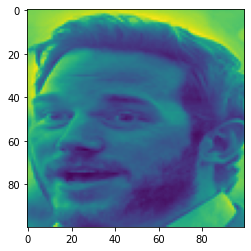

We classify this as a face
1664.7370436754297


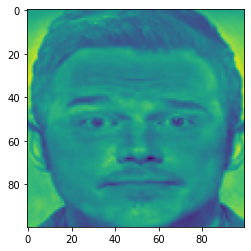

We classify this as a face
1134.922735185171


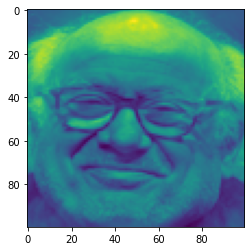

We classify this as a face
911.7132516135877


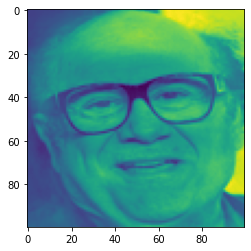

We classify this as a face
348.7070291492688


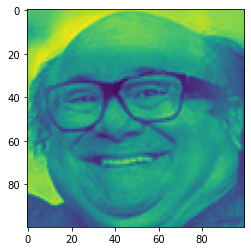

We classify this as a face
578.2093776246477


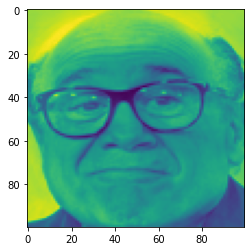

We classify this as a face
1238.1405608112495


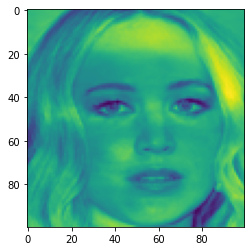

We classify this as a face
1068.7031928027254


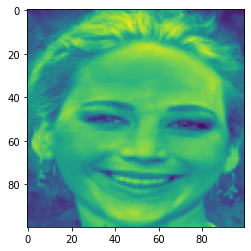

We classify this as a face
1163.3189784768974


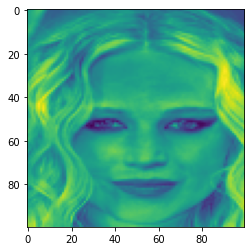

We classify this as a face
1437.3720873833886


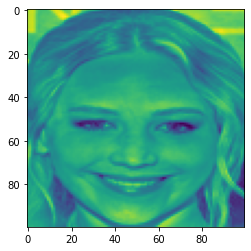

We classify this as a face
1566.8090435322345


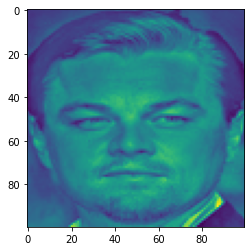

We classify this as a face
1238.1770523882033


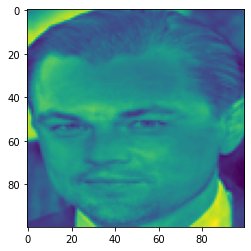

We classify this as a face
1274.4236069630667


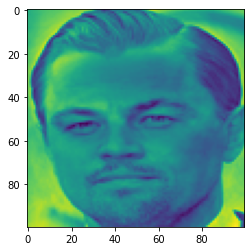

We classify this as a face
1110.6243348536977


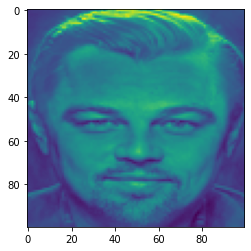

We classify this as a face
1020.6747226595752


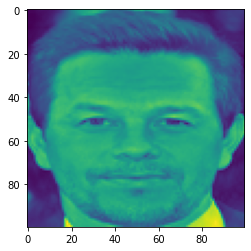

We classify this as a face
1151.8212886979863


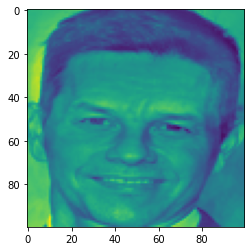

We classify this as a face
504.218599540729


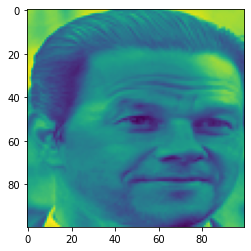

We classify this as a face
478.9231350534785


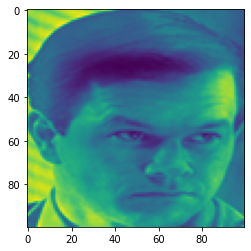

We classify this as a face
813.6297306727793


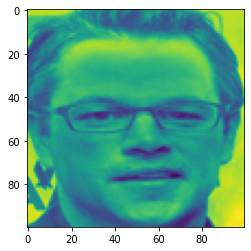

We classify this as a face
1348.0587531085732


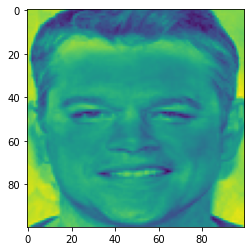

We classify this as a face
968.680993038126


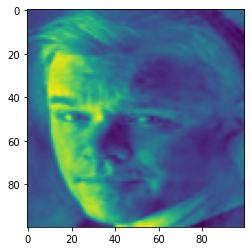

We classify this as a face
793.177084976427


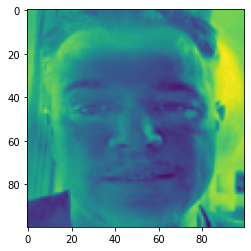

We classify this as a face
580.7672926810184


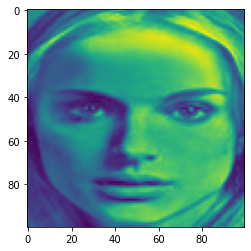

We classify this as a face
1515.8259206889886


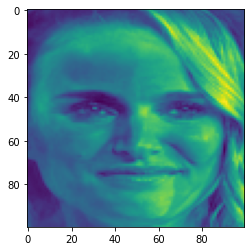

We classify this as a face
559.9941727223394


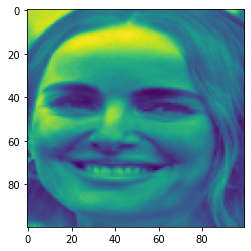

We classify this as a face
1226.0402677160885


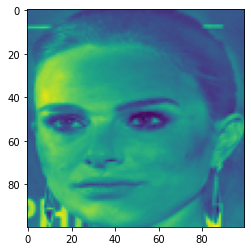

We classify this as a face
1708.6891460046972


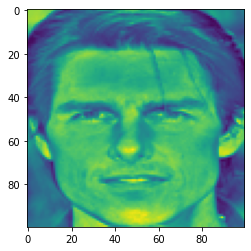

We classify this as a face
532.6807181352405


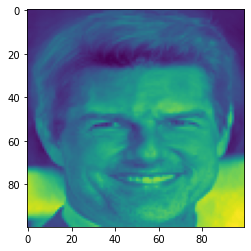

We classify this as a face
1026.0252053016466


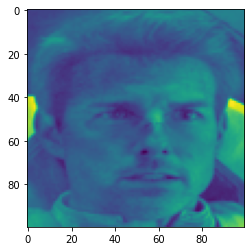

We classify this as a face
645.5523398216695


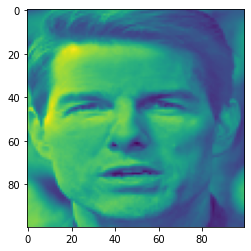

We classify this as a face
1462.7466704289625


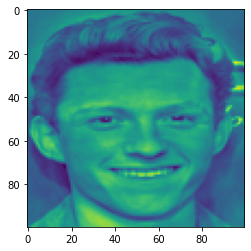

We classify this as a face
1467.0592947197565


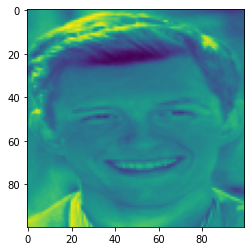

We classify this as a face
1494.7905250676308


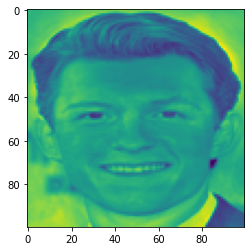

We classify this as a face
1092.7460706451782


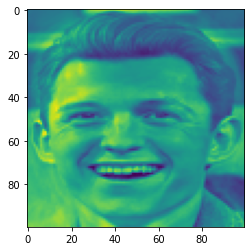

We classify this as a face
1305.0781038965272


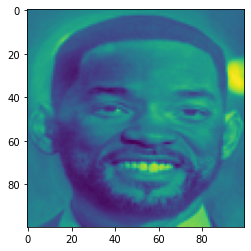

We classify this as a face
565.6557386853929


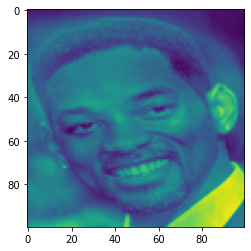

We classify this as a face
1033.8363435548908


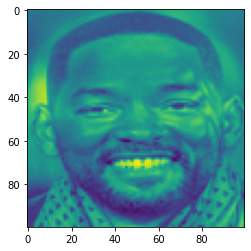

We classify this as a face
1137.715316318877


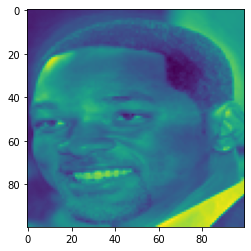

In [29]:
for key in images.keys():
    for j in range(4):
        img = images[key][j]
        solve(img)

friends.jpg


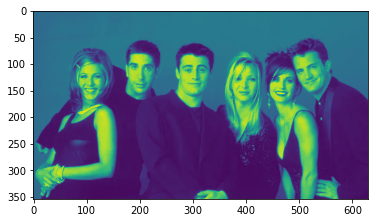

one_man.jpg


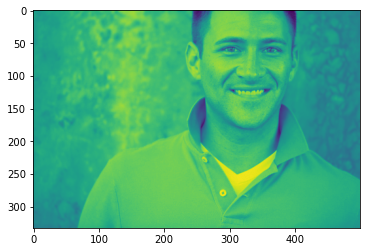

one_woman.jpg


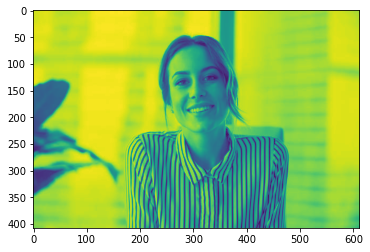

In [19]:
current_dir = 'full_images'
full_img = {}
for image_str in os.listdir(current_dir):
    name = image_str
    img = Image.open(current_dir+'/'+image_str)
#     img = img.resize((size,size)).convert('L')
    full_img[name] = img.convert('L')
    print(name)
    
    plt.imshow(full_img[name])
    plt.show()

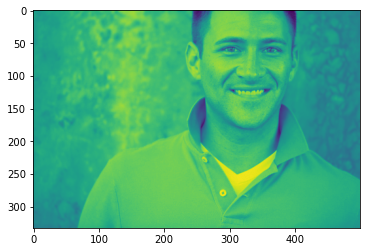

In [20]:
img = full_img['one_man.jpg']
plt.imshow(img)
plt.show()

(0, 0, 150, 150)
We classify this as a face
2062.7459495118646


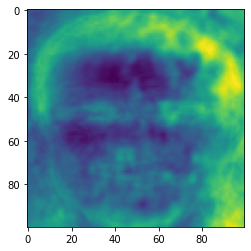

(0, 37, 150, 187)
We classify this as a face
2020.436855476207


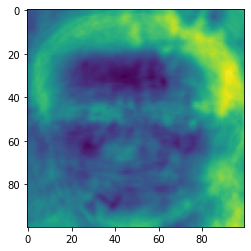

(0, 74, 150, 224)
We classify this as a face
2007.5361154514335


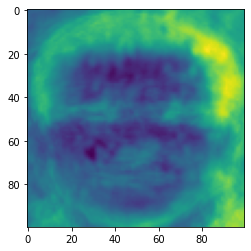

(0, 111, 150, 261)
We classify this as a face
1952.6604404018033


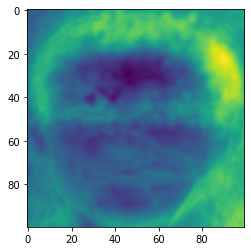

(0, 148, 150, 298)
We classify this as a face
2018.2232477555833


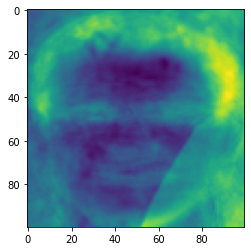

(37, 0, 187, 150)
We classify this as a face
2302.101638080353


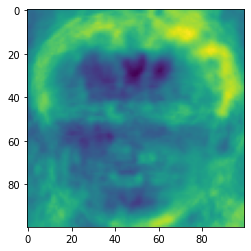

(37, 37, 187, 187)
We classify this as a face
2344.2017379177355


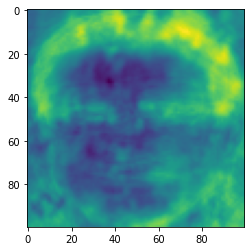

(37, 74, 187, 224)
We classify this as a face
2387.1294878243234


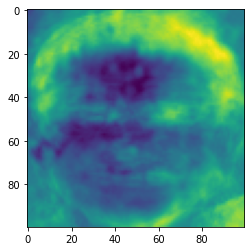

(37, 111, 187, 261)
We classify this as a face
2368.6810057899493


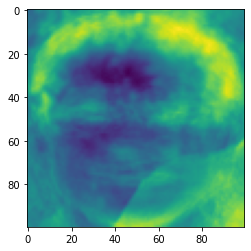

(37, 148, 187, 298)
We classify this as a face
2272.4603444130257


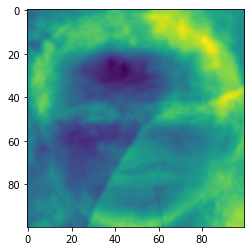

(74, 0, 224, 150)
We classify this as a face
2291.892451114613


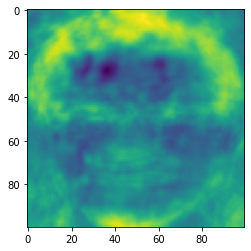

(74, 37, 224, 187)
We classify this as a face
2286.2698496587436


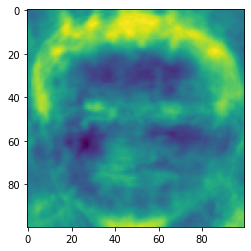

(74, 74, 224, 224)
We classify this as a face
2400.607997577176


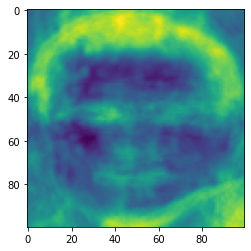

(74, 111, 224, 261)
We classify this as a face
2253.7127059963454


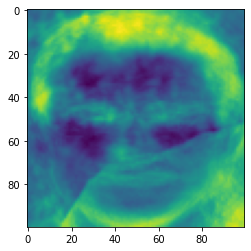

(74, 148, 224, 298)
We classify this as a face
2309.6318382562263


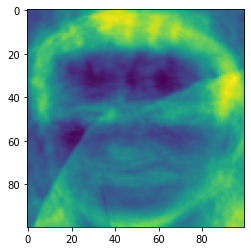

(111, 0, 261, 150)
We classify this as a face
2635.9356410946734


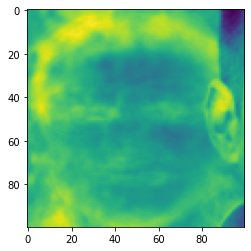

(111, 37, 261, 187)
We classify this as a face
2528.876483121411


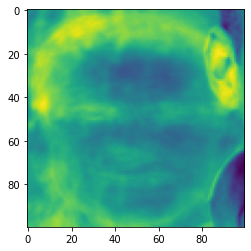

(111, 74, 261, 224)
We classify this as a face
2958.5388370917635


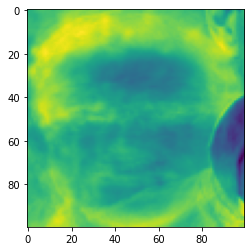

(111, 111, 261, 261)
We classify this as a face
2637.43074689212


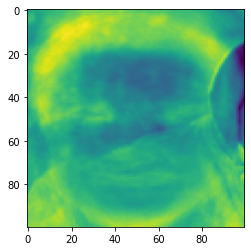

(111, 148, 261, 298)
We classify this as a face
2749.5335976868146


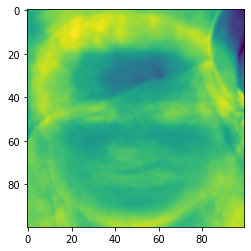

(148, 0, 298, 150)
We classify this as a face
2824.0685124433053


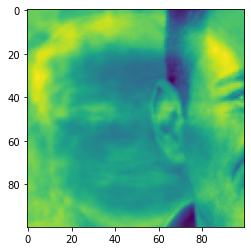

(148, 37, 298, 187)
We classify this as a face
2811.2818997285867


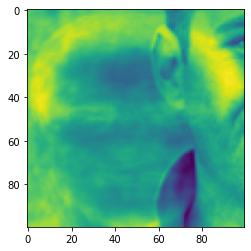

(148, 74, 298, 224)
We classify this as a face
2874.2531162054042


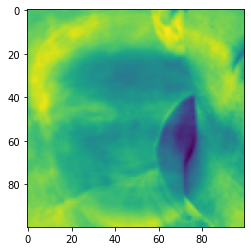

(148, 111, 298, 261)
We classify this as a face
2746.5370170504334


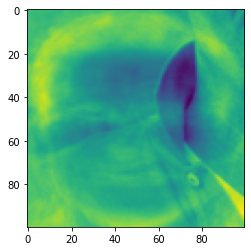

(148, 148, 298, 298)
We classify this as a face
2774.359399126953


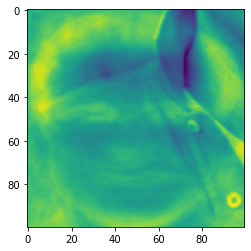

(185, 0, 335, 150)
We classify this as a face
3154.189294708847


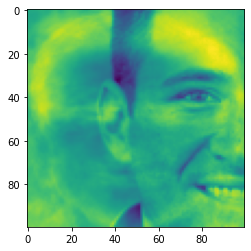

(185, 37, 335, 187)
We classify this as a face
3071.6718185690243


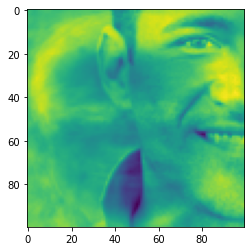

(185, 74, 335, 224)
We classify this as a face
3173.363818972729


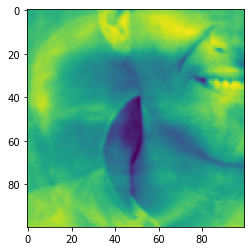

(185, 111, 335, 261)
We classify this as a face
3291.4668857740476


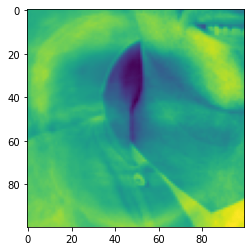

(185, 148, 335, 298)
We classify this as a face
2867.4740827144137


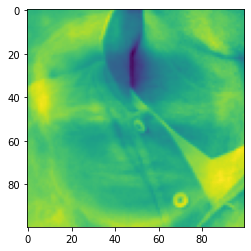

(222, 0, 372, 150)
We classify this as a face
3208.1517315527144


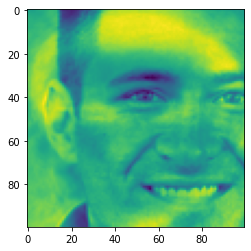

(222, 37, 372, 187)
We classify this as a face
3401.012960026835


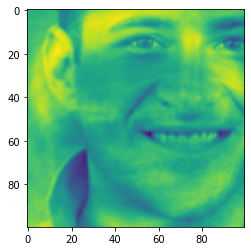

(222, 74, 372, 224)
We classify this as a face
3393.219479223351


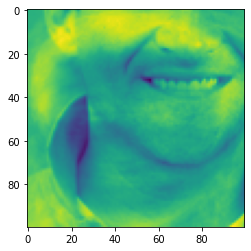

(222, 111, 372, 261)
We classify this as a face
3212.1121120446683


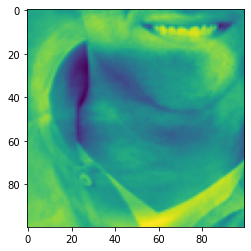

(222, 148, 372, 298)
We classify this as a face
3039.253053094092


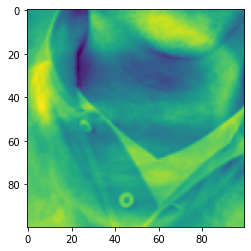

(259, 0, 409, 150)
We classify this as a face
3212.8642276543283


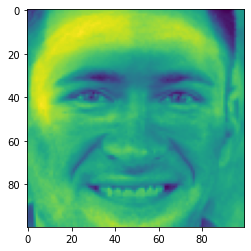

(259, 37, 409, 187)
We classify this as a face
3059.260217723796


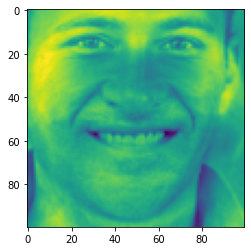

(259, 74, 409, 224)
We classify this as a face
3289.794746646486


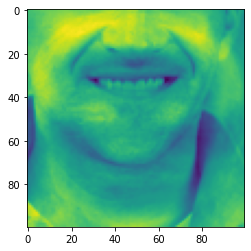

(259, 111, 409, 261)
We classify this as a face
3137.2208124304875


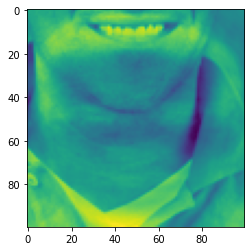

(259, 148, 409, 298)
We classify this as a face
3340.9146261934798


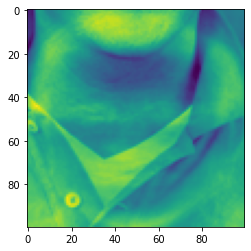

(296, 0, 446, 150)
We classify this as a face
2861.321427160612


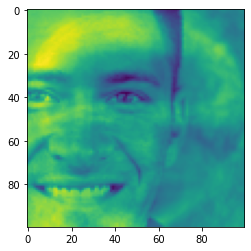

(296, 37, 446, 187)
We classify this as a face
2679.394227356319


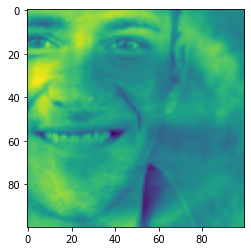

(296, 74, 446, 224)
We classify this as a face
3106.7363785349266


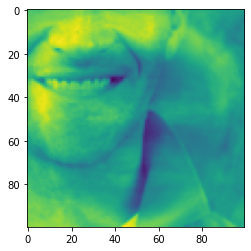

(296, 111, 446, 261)
We classify this as a face
3190.4802720407647


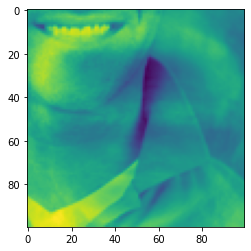

(296, 148, 446, 298)
We classify this as a face
2917.83551771197


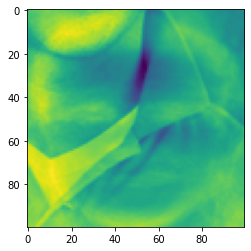

(333, 0, 483, 150)
We classify this as a face
2632.686728073841


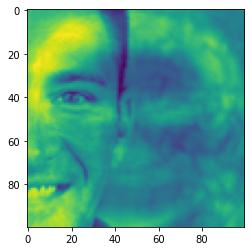

(333, 37, 483, 187)
We classify this as a face
2335.684924514277


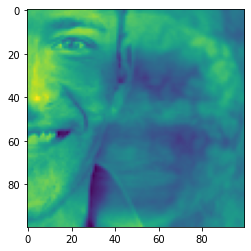

(333, 74, 483, 224)
We classify this as a face
2600.653845027768


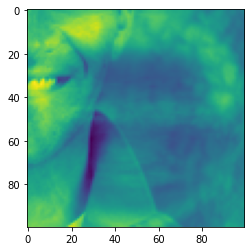

(333, 111, 483, 261)
We classify this as a face
2857.7752293831218


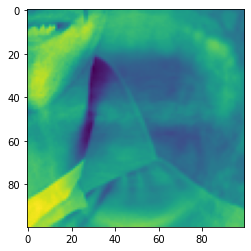

(333, 148, 483, 298)
We classify this as a face
2639.45526062463


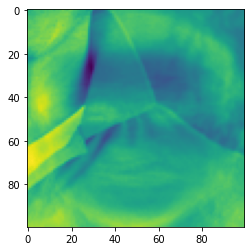

In [21]:
width = 150
height = 150
boxes = []
for i in range(0,img.width,int(width/4)):
        for j in range(0,img.height//2,int(height/4)):
            right = min((i+width),img.width)
            upper = j
            left = i
            lower = min((j + height),img.height)
            if right - left < width or lower-upper < height:
                continue
            bbox = (left,upper,right,lower)
            crop = img.crop(bbox).resize((size,size)).convert('L')
            print(bbox)
    #         plt.imshow(crop)
    #         plt.show()
            if solve(crop):
                boxes.append([left,right,upper,lower])

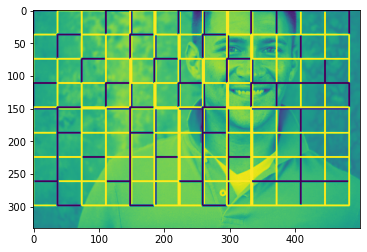

In [22]:
#top left
temp_img = img
for i in range(len(boxes)):
    if(boxes[i] == None):
        continue
    start_point = (boxes[i][0], boxes[i][2]) 

    # represents the bottom right corner of rectangle 
    end_point = (boxes[i][1], boxes[i][3]) 

    # Blue color in BGR 
    color = (255*(i%3), 255*(i+1%3),255*(i+2%3)) 

    # Line thickness of 2 px 
    thickness = 2

    # Using cv2.rectangle() method 
    # Draw a rectangle with blue line borders of thickness of 2 px 
    np_img = np.asarray(temp_img)
    image = cv2.rectangle(np_img, start_point, end_point, color, thickness) 
    temp_img = Image.fromarray(image)
plt.imshow(image)
plt.show()

In [23]:
boxes

[[0, 150, 0, 150],
 [0, 150, 37, 187],
 [0, 150, 74, 224],
 [0, 150, 111, 261],
 [0, 150, 148, 298],
 [37, 187, 0, 150],
 [37, 187, 37, 187],
 [37, 187, 74, 224],
 [37, 187, 111, 261],
 [37, 187, 148, 298],
 [74, 224, 0, 150],
 [74, 224, 37, 187],
 [74, 224, 74, 224],
 [74, 224, 111, 261],
 [74, 224, 148, 298],
 [111, 261, 0, 150],
 [111, 261, 37, 187],
 [111, 261, 74, 224],
 [111, 261, 111, 261],
 [111, 261, 148, 298],
 [148, 298, 0, 150],
 [148, 298, 37, 187],
 [148, 298, 74, 224],
 [148, 298, 111, 261],
 [148, 298, 148, 298],
 [185, 335, 0, 150],
 [185, 335, 37, 187],
 [185, 335, 74, 224],
 [185, 335, 111, 261],
 [185, 335, 148, 298],
 [222, 372, 0, 150],
 [222, 372, 37, 187],
 [222, 372, 74, 224],
 [222, 372, 111, 261],
 [222, 372, 148, 298],
 [259, 409, 0, 150],
 [259, 409, 37, 187],
 [259, 409, 74, 224],
 [259, 409, 111, 261],
 [259, 409, 148, 298],
 [296, 446, 0, 150],
 [296, 446, 37, 187],
 [296, 446, 74, 224],
 [296, 446, 111, 261],
 [296, 446, 148, 298],
 [333, 483, 0, 150],


In [24]:
merge_box(boxes,300)

NameError: name 'merge_box' is not defined

In [ ]:
#top left
temp_img = img

for i in range(len(boxes)):
    if(boxes[i] == None):
        continue
    start_point = (boxes[i][0], boxes[i][2]) 

    # represents the bottom right corner of rectangle 
    end_point = (boxes[i][1], boxes[i][3]) 


    # Blue color in BGR 
    color = (255*(i%3), 255*(i+1%3),255*(i+2%3)) 

    # Line thickness of 2 px 
    thickness = 2

    # Using cv2.rectangle() method 
    # Draw a rectangle with blue line borders of thickness of 2 px 
    np_img = np.asarray(temp_img)
    image = cv2.rectangle(np_img, start_point, end_point, color, thickness) 
    temp_img = Image.fromarray(image)
plt.imshow(image)
plt.show() 

In [ ]:
boxes

In [ ]:
def should_merge(box1, box2,close_dist):
    a = (box1[0], box1[2]), (box1[1], box1[3])
    b = (box2[0], box2[2]), (box2[1], box2[3])

    if any(abs(a_v - b_v) <= close_dist for i in range(2) for a_v, b_v in product(a[i], b[i])):
        return True, [min(*a[0], *b[0]), min(*a[1], *b[1]), max(*a[0], *b[0]), max(*a[1], *b[1])]

    return False, None

def merge_box(boxes, close_dist = 100):
    for i, box1 in enumerate(boxes):
        for j, box2 in enumerate(boxes[i + 1:]):
            is_merge, new_box = should_merge(box1, box2,close_dist)
            if is_merge:
                boxes[i] = None
                boxes[j] = new_box
                break